In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from tabs import DihedralsInfo, VisualizeEnsemble, SortEnsembleByTABS

Get a ``mol`` object

In [2]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 500, 500

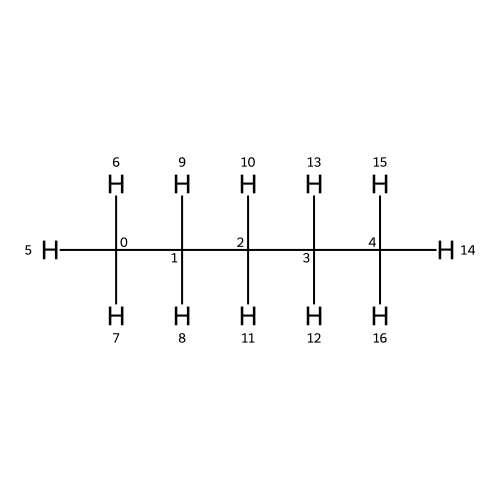

In [3]:
mol = Chem.AddHs(Chem.MolFromSmiles("CCCCC"))
# mol = Chem.AddHs(Chem.MolFromSmiles("OCCCCC=CCCCCO"))
# mol = Chem.AddHs(Chem.MolFromSmiles("C1C(C)CC(CC)CC1"))
mol

First, we build a ``TorsionInfoList`` class object.

By building it with the experimental torsions using ``WithTorsionLibs``, it gets populated with information derived from the Torsion Library.

In [4]:
info = DihedralsInfo.FromTorsionLib(mol)

In [5]:
info.smarts, info.multiplicities, info.torsionTypes, info.indices

(['[!#1:1][CX4H2:2]!@;-[CX4H2:3][!#1:4]',
  '[!#1:1][CX4H2:2]!@;-[CX4H2:3][!#1:4]'],
 [3, 3],
 [<TorsionType.REGULAR: 1>, <TorsionType.REGULAR: 1>],
 [[0, 1, 2, 3], [1, 2, 3, 4]])

In [6]:
info.GetnTABS()

6

In [7]:
info.GetTABS()

ValueError: No conformers found in molecule.

In [23]:
Chem.rdDistGeom.EmbedMultipleConfs(mol, randomSeed=42, numConfs=10)

In [9]:
mol.GetNumConformers()

10

In [10]:
test = DihedralsInfo.FromTorsionLib(mol)
ctors = test.GetConformerTorsions()
ctors

array([[1.04722713, 3.14160212],
       [5.23613491, 5.23606681],
       [1.04709894, 1.04751624],
       [3.14164533, 1.04726229],
       [3.14185206, 5.23617251],
       [3.14159502, 3.14155916],
       [3.14153336, 3.14150147],
       [3.14153691, 3.14158632],
       [3.14150088, 1.04727656],
       [1.04672704, 3.14112578]])

In [11]:
info.GetTABS()

[23, 11, 22, 23, 13, 33, 33, 33, 23, 23]

In [12]:
info.GetTABS(ctors)

[23, 11, 22, 23, 13, 33, 33, 33, 23, 23]

In [13]:
VisualizeEnsemble(mol, dihedral=info.indices[0], showTABS=True);

interactive(children=(IntSlider(value=0, description='confId', max=9), Output()), _dom_classes=('widget-intera…

In [15]:
sortedEnsemble = SortEnsembleByTABS(mol)
sortedEnsemble

defaultdict(list, {23: [0, 3, 8, 9], 11: [1], 22: [2], 13: [4], 33: [5, 6, 7]})

In [16]:
mol = Chem.AddHs(Chem.MolFromSmiles("C1C(C)CC(CC)CC1"))
info = DihedralsInfo.FromTorsionLib(mol)
info.GetnTABS()

/localhome/braunje/.conda/envs/tabs/lib/python3.10/site-packages/tabs/torsions.py:551: UserWarning: WARNING: Molecule has chiral centers with undefined stereo
  torsionList = DihedralsInfo(m)


45

In [17]:
mol3 = Chem.AddHs(Chem.MolFromSmiles("CS(=O)(=O)NCc1nc2cnc3[nH]ccc3c2n1[C@@H]1C[C@H]2CC[C@@H]1C2"))
info = DihedralsInfo.FromTorsionLib(mol3)

In [18]:
info.torsionTypes

[<TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.ADDITIONAL_ROTATABLE_BOND: 4>]

In [19]:
info.GetnTABS()

96

In [20]:
mol5 = Chem.AddHs(Chem.MolFromSmiles('Cc1nc(N)[n+]2c(=O)cc(C)[n-]c2n1'))
mol4 = Chem.AddHs(Chem.MolFromSmiles('CCCc1cc2cc3c(C#C[Si](CC)(CC)CC)c4cc5sc(CCC)cc5cc4c(C#C[Si](CC)(CC)CC)c3cc2s1'))


In [21]:
info = DihedralsInfo.FromTorsionLib(mol)

In [22]:
info.GetnTABS()

45